In [2]:
from utils import prepare_jupyter
prepare_jupyter()

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = '/Users/tomek/University/MgrThesis/EnsembleDiversityResults/experiments-10-08/'
EXP_PATH = os.path.join(DATA_DIR, 'randomforestexperiment-ensemble.csv')

if os.path.exists(EXP_PATH):
    print('Ok')
else:
    print('Uh-oh!')
    
df = pd.read_csv(EXP_PATH)
df.head(n=2)

Ok


,Unnamed: 0,accuracy,corr,coverage_minmax,coverage_std,dataset_name,df,entropy,kw,max_depth,n_estimators,n_jobs,name,node_diversity,q,used_attributes_ratio
0,0,0.798507,0.562162,0.087812,0.039580,SPECT,0.135821,0.197761,0.002361,2,5,-1,RandomForest,0.0,0.486252,0.500000
1,1,0.798507,0.613208,0.092527,0.038235,SPECT,0.144942,0.155224,0.004700,2,10,-1,RandomForest,0.0,0.565967,0.772727


In [27]:
%matplotlib inline

def plot_for(attr='used_attributes_ratio'):
#     a_df = df[df['dataset_name'] == 'splice']
    values = df[[attr, 'accuracy']].values
    results = []

    for i in range(len(values)):
        v_i = values[i]
        for j in range(i, len(values)):
            if i == j:
                continue

            v_j = values[j]


            results.append([np.abs(v_i[0] - v_j[1]),
                            np.mean(v_i[1] - v_j[1])])

    results = np.array(results)

    fig, ax = plt.subplots(figsize=(16, 16))
    ax.scatter(results[:, 0], results[:, 1], marker='.')

    plt.show()

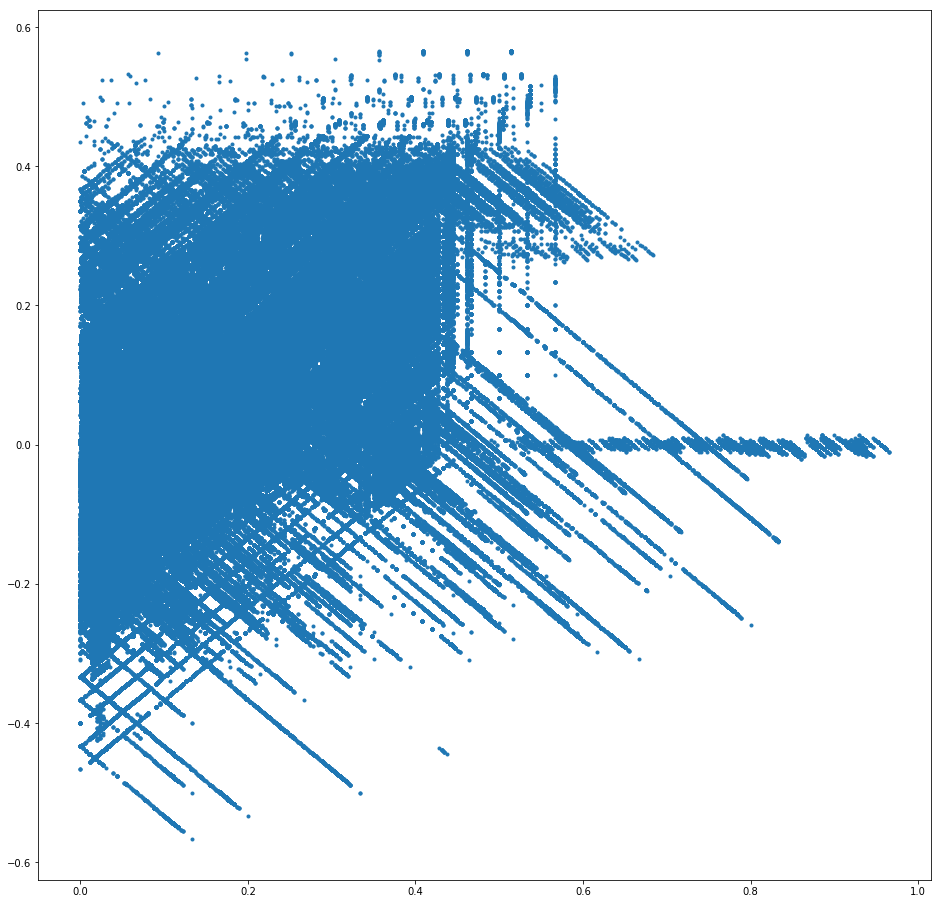

In [28]:
plot_for('used_attributes_ratio')

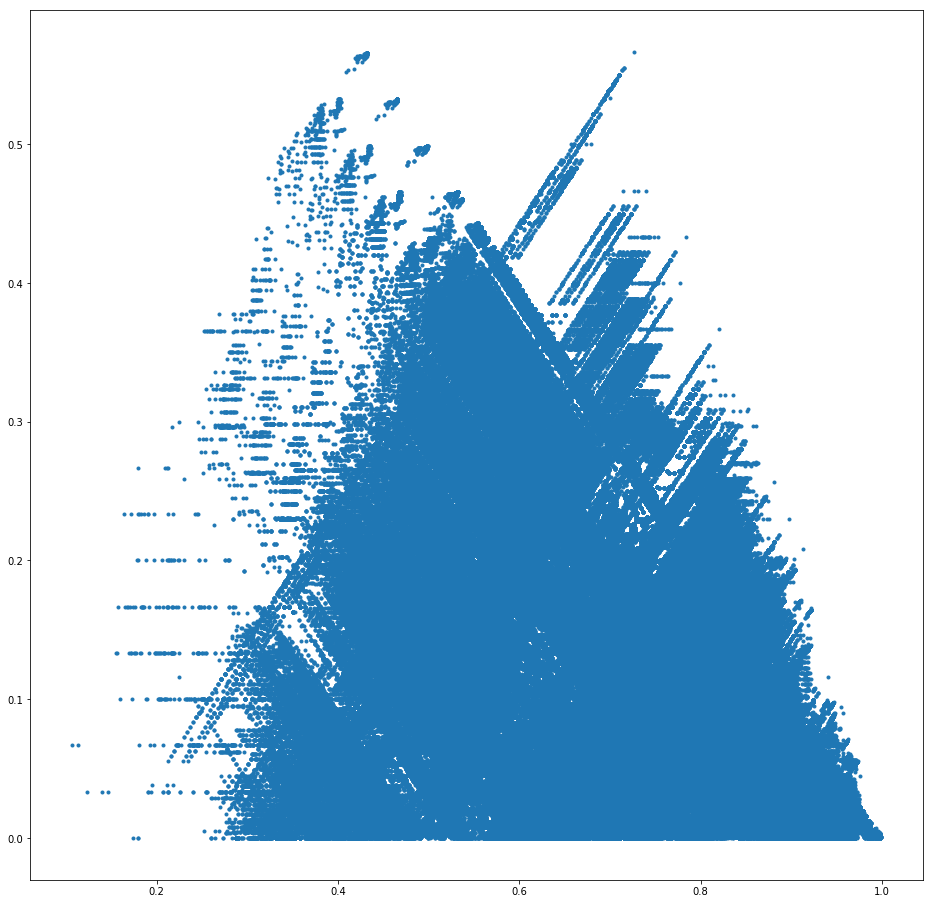

In [15]:
plot_for('df')

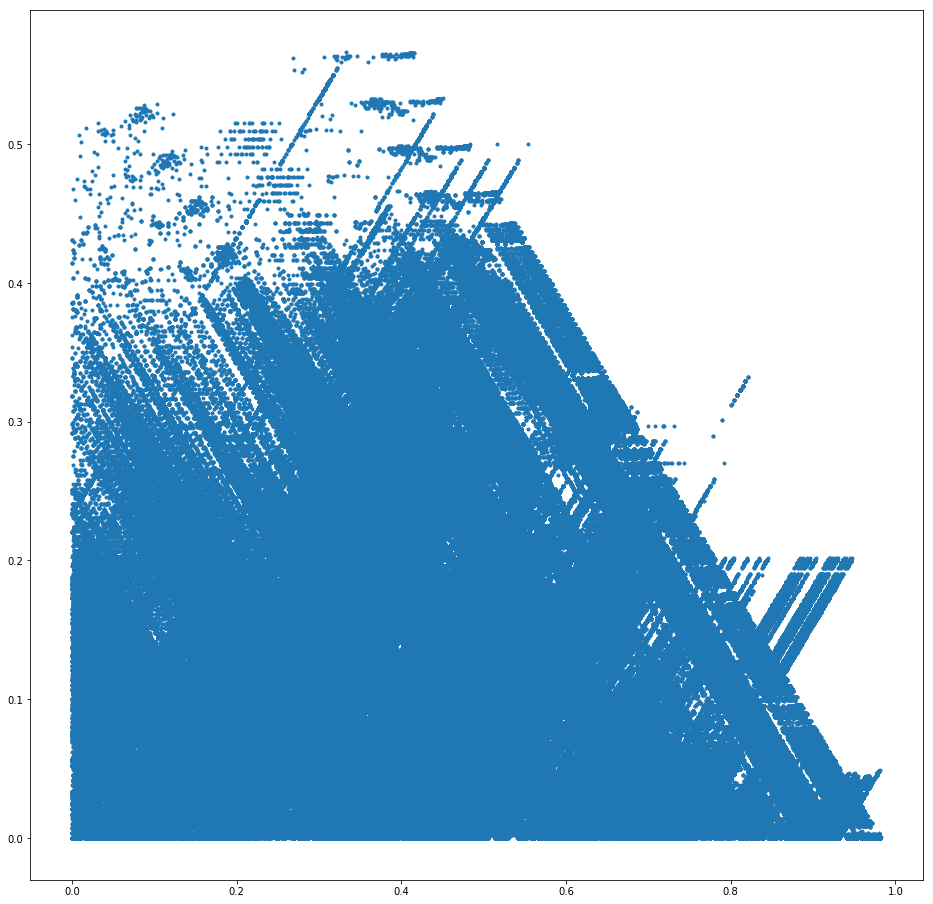

In [16]:
plot_for('entropy')

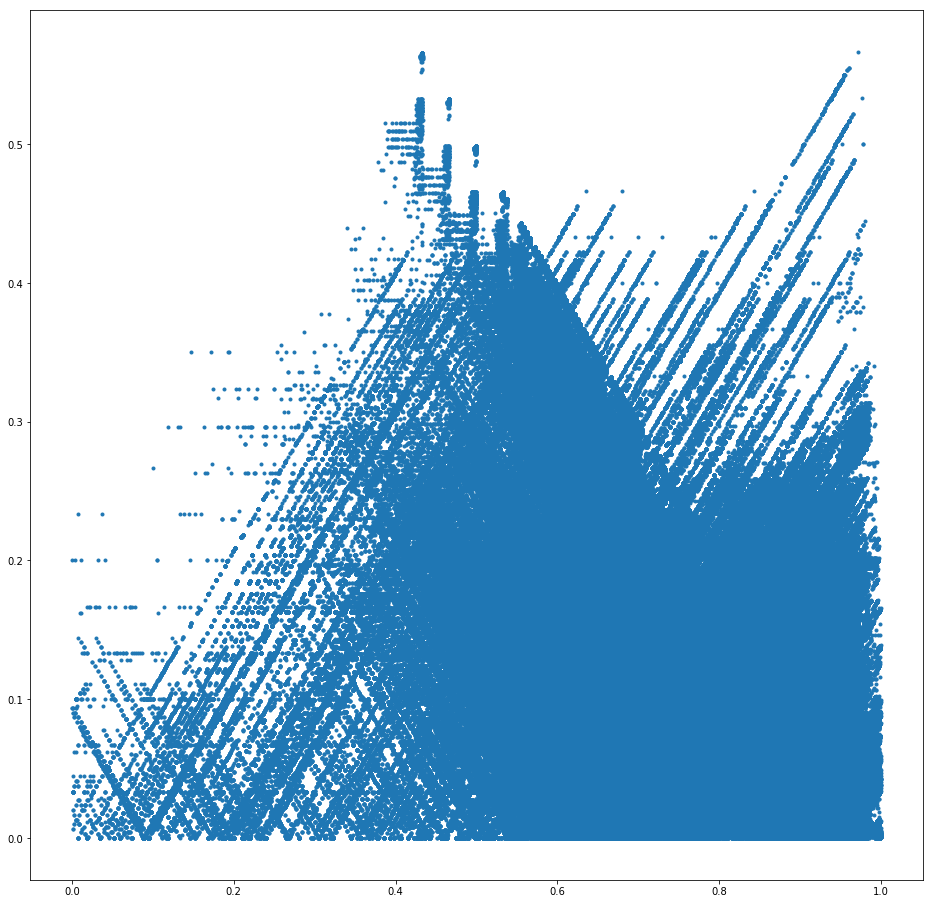

In [17]:
plot_for('kw')

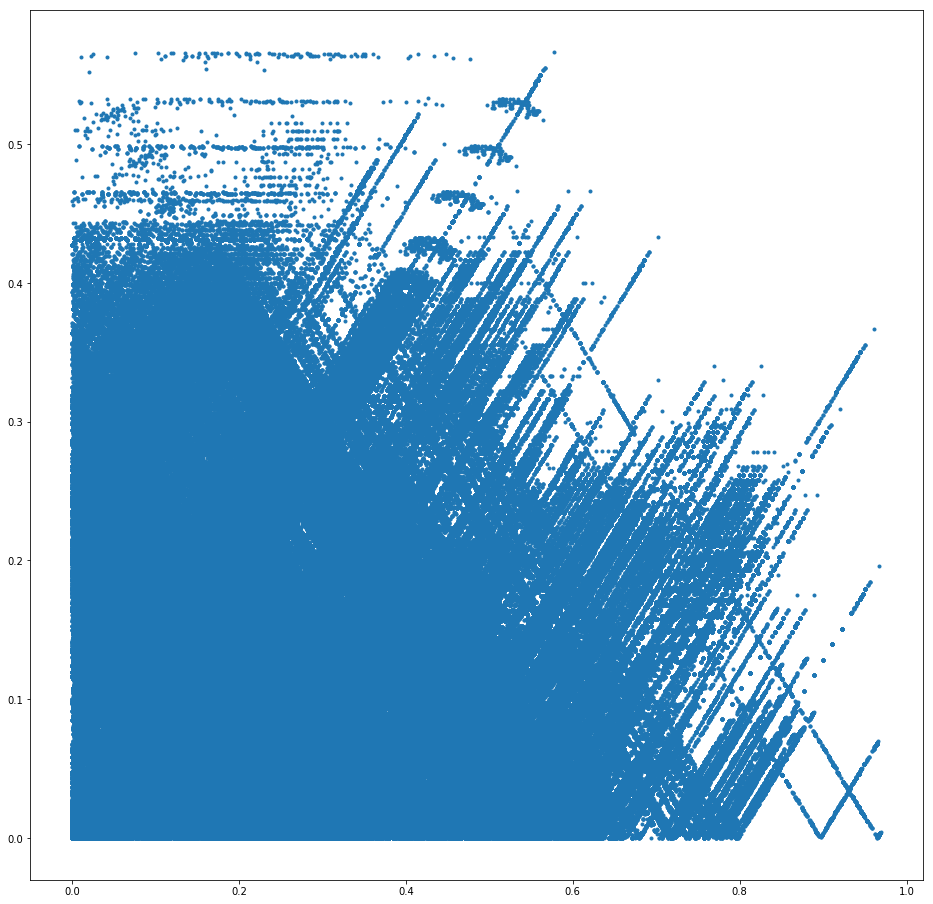

In [18]:
plot_for('q')